In [4]:
import pandas as pd
import re

In [2]:
policy = pd.read_csv('policy_info_topic.csv',encoding='utf-8')
policy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title_url      162 non-null    object 
 1   describes      164 non-null    object 
 2   channel        162 non-null    object 
 3   title          160 non-null    object 
 4   pcode          30 non-null     object 
 5   puborg         27 non-null     object 
 6   childtype      18 non-null     object 
 7   indexs         16 non-null     object 
 8   summary        0 non-null      float64
 9   ptime          19 non-null     object 
 10  pubtime        116 non-null    object 
 11  html           0 non-null      float64
 12  updatetime     165 non-null    object 
 13  codes          165 non-null    int64  
 14  contentText    160 non-null    object 
 15  key_search     0 non-null      float64
 16  key_dict       0 non-null      float64
 17  conStatus      165 non-null    int64  
 18  resCon    

In [3]:
policy_1 = policy[policy['couny'] == '国内']
policy_1 = policy_1[policy_1['contentText'].isnull() == False]
policy_1

,title_url,describes,channel,title,pcode,puborg,childtype,indexs,summary,ptime,...,key_search,key_dict,conStatus,resCon,htmlStatus,effectiveness,couny,class_type,noid,disclosure
0,https://www.gov.cn/zhengce/2022-12/19/content_...,[1] 2022年12月2日 中共中央 国务院关于构建数据基础制度更好发挥数据要素作用的意见,中华人民共和国中央人民政府,中共中央 国务院关于构建数据基础制度更好发挥数据要素作用的意见,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,PCFET0NUWVBFIEhUTUwgUFVCTElDICItLy9XM0MvL0RURC...,1,NaN,国内,NaN,NaN,NaN
1,http://www.caict.ac.cn/english/research/whitep...,[2]2023年9月 中国信息通信研究院 数据要素白皮书,中国信息通信研究院,数据要素白皮书\r\n(2023 年)\r\n,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,1,NaN,国内,NaN,NaN,NaN
2,https://www.gov.cn/zhengce/2022-12/20/content_...,[3] 2022年12月20日 新华社 构建数据基础制度 更好发挥数据要素作用——国家发展改...,中华人民共和国中央人民政府,构建数据基础制度 更好发挥数据要素作用——国家发展改革委负责同志答记者问,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,PCFET0NUWVBFIEhUTUwgUFVCTElDICItLy9XM0MvL0RURC...,1,NaN,国内,NaN,NaN,NaN
3,https://www.gov.cn/zhengce/2022-12/21/content_...,[4] 2022年12月21日 人民日报海外版 “数据二十条”对外发布，构建数据基础制度体系...,中华人民共和国中央人民政府,“数据二十条”对外发布，构建数据基础制度体系——做强做优做大数字经济,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,PCFET0NUWVBFIEhUTUwgUFVCTElDICItLy9XM0MvL0RURC...,1,NaN,国内,NaN,NaN,NaN
4,https://www.gov.cn/lianbo/bumen/202403/content...,[5] 2024年03月25日 加快完善数据基础制度 一批政策文件将出台,中华人民共和国中央人民政府,加快完善数据基础制度 一批政策文件将出台,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,PCFET0NUWVBFIEhUTUwgUFVCTElDICItLy9XM0MvL0RURC...,1,NaN,国内,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,http://www.xj.gov.cn/info/1059/74053.htm,[27]新疆电子政务外网. 国务院关于印发《中国（新疆）自由贸易试验区总体方案》的通知 [E...,新疆电子政务外网,国务院关于印发《中国（新疆）自由贸易试验区总体方案》的通知,国发〔2023〕17号,国务院,NaN,NaN,NaN,NaN,...,NaN,NaN,0,PCFET0NUWVBFIGh0bWwgUFVCTElDICItLy9XM0MvL0RURC...,1,NaN,国内,NaN,NaN,NaN
161,https://www.tongliao.gov.cn/ztzl/lqhmzczl/lqzc...,[28]通辽市人民政府. 内蒙古自治区人民政府办公厅关于印发自治区推动数字经济高质量发展工作...,通辽市人民政府,内蒙古自治区人民政府办公厅关于印发自治区推动数字经济高质量发展工作方案（2023—2025年...,NaN,自治区人民政府办公厅,NaN,NaN,NaN,NaN,...,NaN,NaN,0,PCFET0NUWVBFIGh0bWw+CjxodG1sIGxhbmc9ImVuIj4KCj...,1,NaN,国内,NaN,NaN,NaN
162,https://www.nx.gov.cn/zwgk/qzfwj/202201/t20220...,[29]宁夏回族自治区人民政府人民政府. 自治区人民政府办公厅关于印发宁夏回族自治区数字经济...,宁夏回族自治区人民政府,自治区人民政府办公厅关于印发宁夏回族自治区数字经济发展“十四五”规划的通知,宁政办发〔2021〕69号,自治区人民政府办公厅,综合政务,640000/2022-00039,NaN,2021-09-29,...,NaN,NaN,0,PCFET0NUWVBFIGh0bWw+CjxodG1sIGxhbmc9ImVuIj4KIC...,1,有效,国内,NaN,NaN,NaN
163,http://www.gxzf.gov.cn/zt/jd/szgxjszl/xgwj/t17...,[30]广西壮族自治区人民政府. 广西壮族自治区人民政府办公厅关于印发广西构建数据基础制度更...,广西壮族自治区人民政府,广西壮族自治区人民政府办公厅关于印发\r\n广西构建数据基础制度更好发挥数据\r\n要素作用...,NaN,广西壮族自治区人民政府办公厅,NaN,NaN,NaN,NaN,...,NaN,NaN,0,PCFET0NUWVBFIGh0bWw+CjxodG1sIGxhbmc9InpoLWNtbi...,1,NaN,国内,NaN,NaN,NaN


In [6]:
with open('policy_strip.txt','w',encoding='utf-8') as f:

    j = 0
    for i, row in policy_1.iterrows():
        # contentText = row['contentText'].replace('\n','')
        contentText = re.sub(r'[\r\n\u2028\u2029]', '', row['contentText'])
        contentText = re.sub(r'\t', '。', contentText)
        # contentText = row['contentText'].replace('\n','')

        f.write(f'##第{j+1}条政策\n\n')
        f.write(f'###政策标题：\n{row["title"]}\n\n')
        # f.write(f'###政策时间：{row["publishDate"]}\n\n')
        f.write(f'###政策内容：\n{contentText.replace('\n','')}\n\n')

        j += 1

In [13]:
with open('policy_single_sentence_bydoc.txt','w',encoding='utf-8') as f:
    j = 0
    for i, row in policy_1.iterrows():
        # contentText = row['contentText'].replace('\n','')
        contentText = re.sub(r'[\r\n\u2028\u2029]', '', row['contentText'])
        contentText = re.sub(r'\t', '。', contentText)
        # contentText = row['contentText'].replace('\n','')
        f.write("##21kknaehfal##\n\n")
        sentences = re.split(r'。', contentText)
        for sentence in sentences:
            if len(sentence) >= 10 and (("http" in sentence or "www" in sentence or '.com' in sentence) == False):
                if sentence[0] in ['表','图','附录','附件','附表','附图','附录']:
                    continue
                sentence = sentence.replace(' ', '')
                f.write(f'{sentence}。\n\n')
                j += 1
        # j += 1
    print(f'一共{j}个句子')

一共14652个句子


In [8]:
# 创建WeiMingPolicies目录，将每一份政策单独存储为txt文件，文件名为政策标题（去除非法字符）
import os

def remove_illegal_characters(text):
    # 定义正则表达式，匹配非法字符（包括：\/:*?"<>|，以及空格、制表符等）
    pattern = r'[\\/:*?"<>| ]'
    # 使用re.sub()函数替换非法字符为空字符串
    cleaned_text = re.sub(pattern, '', text)
    # 去除制表符
    cleaned_text = cleaned_text.replace('\t', '')
    # 去除空格
    cleaned_text = cleaned_text.replace(' ', '')

    return cleaned_text

if not os.path.exists('WeiMingPolicies'):
    os.makedirs('WeiMingPolicies')

for i, row in policy_1.iterrows():
    # contentText = row['contentText'].replace('\n','')
    contentText = re.sub(r'[\r\n\u2028\u2029]', '', row['contentText'])
    contentText = re.sub(r'\t', '。', contentText)
    # contentText = row['contentText'].replace('\n','')

    # 去除非法字符
    title = remove_illegal_characters(row['title'])
    time = row['pubtime'] if row['pubtime'] != '' else '未知时间'
    channel = row['channel'] if row['channel'] != '' else '未知频道'
    describe = row['describes'] if row['describes'] != '' else '未知描述'
    with open(f'WeiMingPolicies/{title}.txt', 'w', encoding='utf-8') as f:
        f.write(f'##政策标题：\n{row["title"]}\n\n')
        f.write(f'###政策频道：\n{channel}\n\n')
        f.write(f'###政策时间：\n{time}\n\n')
        f.write(f'###政策描述：\n{describe}\n\n')
        f.write(f'###政策内容：\n')
        f.write(contentText)


In [5]:
# 清洗数据，去除空格、制表符、换行符。保存为Policys_cleaned.csv，内容包括政策标题、政策时间、政策频道、政策描述、政策内容
policy_1['contentText'] = policy_1['contentText'].replace(r'[\r\n\u2028\u2029]', '', regex=True)
policy_1['contentText'] = policy_1['contentText'].replace(r'\t', '。', regex=True)
policy_1['contentText'] = policy_1['contentText'].replace(r' ', '', regex=True)
policy_1['contentText'] = policy_1['contentText'].replace(r'\n', '', regex=True)

policy_1['contentText'] = policy_1['contentText'].replace(r'\s+', '', regex=True)
policy_1['contentText'] = policy_1['contentText'].replace(r'\t+', '', regex=True)

# save
policy_2 = policy_1[['title', 'pubtime', 'channel', 'describes', 'contentText']]
policy_2.to_csv('Policys_cleaned.csv', index=False, encoding='utf-8')


C:\Users\n08n0\AppData\Local\Temp\ipykernel_8708\1971764199.py:32: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  plt.grid(visible=False, which='both', linestyle='--', linewidth=0.5)


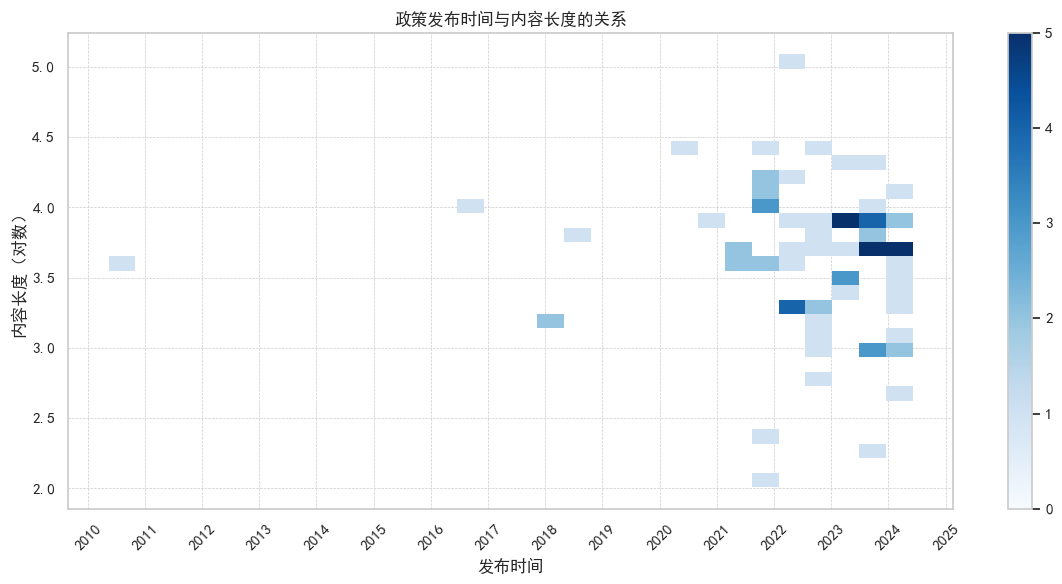

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from matplotlib.dates import MonthLocator, DateFormatter, YearLocator
import numpy as np
rcParams['font.sans-serif'] = ['SimHei']  # 用于正常显示中文标签
rcParams['axes.unicode_minus'] = False   # 用于正常显示负号
# 读取清洗后的数据
policy_2 = pd.read_csv('Policys_cleaned.csv', encoding='utf-8')


# 计算 contentText 的长度并取对数
policy_2['content_length'] = policy_2['contentText'].apply(lambda x: len(str(x)))
policy_2['log_content_length'] = policy_2['content_length'].apply(lambda x: np.log10(x) if x > 0 else 0)

# 确保 pubtime 是日期格式
policy_2['pubtime'] = pd.to_datetime(policy_2['pubtime'], errors='coerce')

# 绘制双变量直方图
plt.figure(figsize=(12, 6))
sns.histplot(data=policy_2, x='pubtime', y='log_content_length', bins=(30, 30), cmap='Blues', cbar=True)
plt.title('政策发布时间-内容长度关系图')
plt.xlabel('发布时间')
plt.ylabel('内容长度（log10）')
plt.xticks(rotation=45)

# 只在整年时显示时间标签
ax = plt.gca()
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
plt.grid(visible=False, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('./images/policy_pubtime_log_content_length.png', dpi=300)



C:\Users\n08n0\AppData\Local\Temp\ipykernel_8708\4202180629.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_channels.values, y=top_10_channels.index, palette='viridis')
C:\Users\n08n0\AppData\Local\Temp\ipykernel_8708\4202180629.py:14: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  plt.grid(visible=False, which='both', linestyle='--', linewidth=0.5)


总字符数：908574
总频道数：61
总文档数：99
平均字数：9177.52


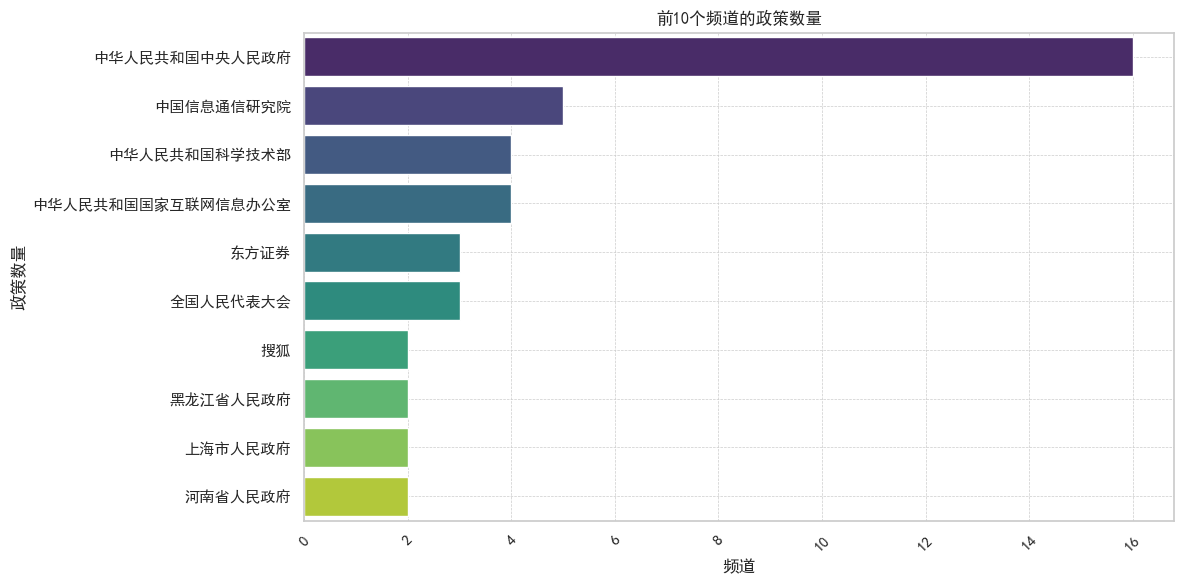

In [19]:
# 统计每个频道的政策数量, 并绘制前10个频道的柱状图，并输出总频道、总文档数

# 统计每个频道的政策数量
policy_count = policy_2['channel'].value_counts()
# 取前10个频道
top_10_channels = policy_count.head(10)
# 绘制柱状图
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_channels.values, y=top_10_channels.index, palette='viridis')
plt.title('前10个频道的政策数量')
plt.xlabel('频道')
plt.ylabel('政策数量')
plt.xticks(rotation=45)
plt.grid(visible=False, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('./images/top_10_channels_policy_count.png', dpi=300)
# 输出总频道、总文档数、平均字数、总字符数
total_channels = policy_2['channel'].nunique()
total_documents = policy_2.shape[0]
average_length = policy_2['content_length'].mean()
print(f'总字符数：{policy_2["content_length"].sum()}')
print(f'总频道数：{total_channels}')
print(f'总文档数：{total_documents}')
print(f'平均字数：{average_length:.2f}')


In [20]:
# 统计总句子数，平均句子数，平均句子长度
policy_2['sentence_count'] = policy_2['contentText'].apply(lambda x: len(re.findall(r'。', str(x))) + 1)
policy_2['average_sentence_length'] = policy_2['content_length'] / policy_2['sentence_count']
total_sentences = policy_2['sentence_count'].sum()
average_sentences = policy_2['sentence_count'].mean()
average_sentence_length = policy_2['average_sentence_length'].mean()
print(f'总句子数：{total_sentences}')
print(f'平均句子数：{average_sentences:.2f}')
print(f'平均句子长度：{average_sentence_length:.2f}')


总句子数：19335
平均句子数：195.30
平均句子长度：64.83
